<a href="https://colab.research.google.com/github/HarshaSolingaram/INFO_5731/blob/main/Solingaram_Harshavardhan_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

import re
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Sample dataset of reviews
mypath = '/content/drive/My Drive/INFO 5731/df_cleaned_data.csv'
df = pd.read_csv(mypath)
print("length of dataset",len(df))

#lets limit the data set to 150 reviews, the colab server is not supporting for the whole data set and it chrashed for me.
# so i am limiting the dataset to 150, so that it can be quick and supportive
df = df.head(150)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
length of dataset 9997


,lemmatized
0,present fashionmnist new dataset comprising x ...
1,tensorflow machine learning system operates la...
2,tensorflow interface expressing machine learni...
3,goal precipitation nowcasting predict future r...
4,machine learning address question build comput...
...,...
145,basic idea quantum computing surprisingly simi...
146,measuring consumption wealth remotely nighttim...
147,machine learning becomes widely used automated...
148,nearly aspect modern life way changed big data...


In [2]:

import csv
import re
from collections import defaultdict

import itertools
import collections

from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk import ngrams
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import re
import pandas as pd


def tokenize(text):
    if pd.isnull(text):
        return []
    words = re.findall(r'\b\w+\b', str(text).lower())
    return words

# Function to generate N-grams from a list of words
def generate_ngrams(words, n):
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

# Function to count the frequency of each N-gram
def count_ngrams(ngrams):
    frequency = {}
    for ngram in ngrams:
        if ngram in frequency:
            frequency[ngram] += 1
        else:
            frequency[ngram] = 1
    return frequency

# Main function to perform N-gram analysis
def ngram_analysis(data, n):
    all_ngrams = []
    for text in data:
        words = tokenize(text)
        ngrams = generate_ngrams(words, n)
        all_ngrams.extend(ngrams)
    frequency = count_ngrams(all_ngrams)
    return frequency

# Perform N-gram analysis for N=3
ngram_freq = ngram_analysis(df['lemmatized'], 3)

# Display the frequency of all the N-grams (N=3)
for ngram, freq in ngram_freq.items():
    print(f"N-gram: '{ngram}', Frequency: {freq}")


Streaming output truncated to the last 5000 lines.
N-gram: 'required although small', Frequency: 1
N-gram: 'although small machine', Frequency: 1
N-gram: 'small machine learning', Frequency: 1
N-gram: 'learning model trained', Frequency: 1
N-gram: 'model trained modest', Frequency: 1
N-gram: 'trained modest amount', Frequency: 1
N-gram: 'modest amount data', Frequency: 1
N-gram: 'amount data input', Frequency: 1
N-gram: 'data input training', Frequency: 1
N-gram: 'input training larger', Frequency: 1
N-gram: 'training larger model', Frequency: 1
N-gram: 'larger model neural', Frequency: 1
N-gram: 'neural network grows', Frequency: 1
N-gram: 'network grows exponentially', Frequency: 1
N-gram: 'grows exponentially number', Frequency: 1
N-gram: 'exponentially number parameter', Frequency: 1
N-gram: 'number parameter since', Frequency: 1
N-gram: 'parameter since demand', Frequency: 1
N-gram: 'since demand processing', Frequency: 1
N-gram: 'demand processing training', Frequency: 1
N-gram: 

In [4]:
# Function to generate bigrams from a list of words
def generate_bigrams(words):
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    return bigrams

# Function to count the frequency of each bigram and each word
def count_bigrams_and_words(data):
    bigram_freq = {}
    word_freq = {}
    for text in data:
        words = tokenize(text)
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
        bigrams = generate_bigrams(words)
        for bigram in bigrams:
            if bigram in bigram_freq:
                bigram_freq[bigram] += 1
            else:
                bigram_freq[bigram] = 1
    return bigram_freq, word_freq

# Function to calculate probabilities for all bigrams
def calculate_bigram_probabilities(bigram_freq, word_freq):
    bigram_probabilities = {}
    for bigram, freq in bigram_freq.items():
        word2, word1 = bigram
        probability = freq / word_freq[word2]
        bigram_probabilities[bigram] = probability
    return bigram_probabilities

# Main function to perform bigram probability calculation
def bigram_probability_analysis(data):
    bigram_freq, word_freq = count_bigrams_and_words(data)
    bigram_probabilities = calculate_bigram_probabilities(bigram_freq, word_freq)
    return bigram_probabilities

# Perform bigram probability analysis
bigram_probabilities = bigram_probability_analysis(df['lemmatized'])

# Display the probabilities for all bigrams
for bigram, probability in bigram_probabilities.items():
    print(f"Bigram: {bigram}, Probability: {probability}")

Streaming output truncated to the last 5000 lines.
Bigram: ('accuracy', 'addition'), Probability: 0.03225806451612903
Bigram: ('addition', 'machine'), Probability: 0.0625
Bigram: ('method', 'strong'), Probability: 0.006493506493506494
Bigram: ('strong', 'generalizability'), Probability: 0.125
Bigram: ('generalizability', 'also'), Probability: 1.0
Bigram: ('also', 'able'), Probability: 0.02040816326530612
Bigram: ('able', 'detect'), Probability: 0.16666666666666666
Bigram: ('detect', 'unknown'), Probability: 1.0
Bigram: ('attack', 'deep'), Probability: 0.015384615384615385
Bigram: ('learning', 'branch'), Probability: 0.0019801980198019802
Bigram: ('branch', 'machine'), Probability: 0.3333333333333333
Bigram: ('learning', 'whose'), Probability: 0.0019801980198019802
Bigram: ('whose', 'performance'), Probability: 0.5
Bigram: ('performance', 'remarkable'), Probability: 0.02
Bigram: ('remarkable', 'become'), Probability: 0.5
Bigram: ('become', 'research'), Probability: 0.08333333333333333
B

In [5]:
import re
import pandas as pd
from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize, pos_tag, RegexpParser


# Function to extract noun phrases from text
def extract_noun_phrases(text):
    if pd.isnull(text):
        return []
    grammar = r"""
        NP: {<DT|JJ|NN.*>+}
    """
    chunk_parser = RegexpParser(grammar)
    tagged_words = pos_tag(word_tokenize(str(text)))
    tree = chunk_parser.parse(tagged_words)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrase = ' '.join(word for word, pos in subtree.leaves())
            noun_phrases.append(noun_phrase)
    return noun_phrases

# Function to calculate the frequency of each noun phrase
def calculate_noun_phrase_frequency(data):
    noun_phrases_freq = Counter()
    for text in data:
        noun_phrases = extract_noun_phrases(text)
        noun_phrases_freq.update(noun_phrases)
    return noun_phrases_freq

# Function to calculate the relative probabilities for each review
def calculate_relative_probabilities(data, noun_phrases_freq):
    max_freq = max(noun_phrases_freq.values())
    relative_probabilities = {}
    for i, text in enumerate(data):
        noun_phrases = extract_noun_phrases(text)
        review_probabilities = {}
        for noun_phrase in noun_phrases:
            frequency = noun_phrases_freq[noun_phrase]
            relative_probability = frequency / max_freq
            review_probabilities[noun_phrase] = relative_probability
        relative_probabilities[f'Review {i+1}'] = review_probabilities
    return relative_probabilities

# Perform noun phrase extraction and calculate relative probabilities
noun_phrases_freq = calculate_noun_phrase_frequency(df['lemmatized'])
relative_probabilities = calculate_relative_probabilities(df['lemmatized'], noun_phrases_freq)

# Print the results in a table
# Print the results in a table with null values replaced by "0"
noun_phrases_list = list(noun_phrases_freq.keys())
df_relative_probabilities = pd.DataFrame.from_dict(relative_probabilities, orient='index')
df_relative_probabilities = df_relative_probabilities.reindex(columns=noun_phrases_list).fillna(0)
print(df_relative_probabilities)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


            present fashionmnist new dataset  \
Review 1                            0.009709   
Review 11                           0.000000   
Review 2                            0.000000   
Review 3                            0.000000   
Review 17                           0.000000   
...                                      ...   
Review 112                          0.000000   
Review 122                          0.000000   
Review 141                          0.000000   
Review 143                          0.000000   
Review 146                          0.000000   

            x grayscale image fashion product category image  \
Review 1                                            0.009709   
Review 11                                           0.000000   
Review 2                                            0.000000   
Review 3                                            0.000000   
Review 17                                           0.000000   
...                                    

In [11]:
df_relative_probabilities

,present fashionmnist new dataset,x grayscale image fashion product category image,category training,image test,image fashionmnist,serve direct dropin replacement original mnist dataset benchmarking machine,algorithm share image size data format structure,split,available http url,tensorflow machine,...,intricate theory psychological mechanism little unknown ability,future behavior appreciable accuracy propose principle technique field machine,help psychology,predictive science review fundamental concept tool machine,point example concept,conduct,important psychological research focus predictive research question,focus prediction,lead u,understanding behavior
Review 1,0.009709,0.009709,0.009709,0.009709,0.009709,0.009709,0.009709,0.009709,0.019417,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019417,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review 112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [6]:
# Write your code here

import re
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Sample dataset of reviews
mypath = '/content/drive/My Drive/INFO 5731/df_cleaned_data.csv'
df = pd.read_csv(mypath)
print("length of dataset",len(df))

#lets limit the data set to 150 reviews, the colab server is not supporting for the whole data set and it chrashed for me.
# so i am limiting the dataset to 150, so that it can be quick and supportive
newdf = df.head(150)
newdf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
length of dataset 9997


,lemmatized
0,present fashionmnist new dataset comprising x ...
1,tensorflow machine learning system operates la...
2,tensorflow interface expressing machine learni...
3,goal precipitation nowcasting predict future r...
4,machine learning address question build comput...
...,...
145,basic idea quantum computing surprisingly simi...
146,measuring consumption wealth remotely nighttim...
147,machine learning becomes widely used automated...
148,nearly aspect modern life way changed big data...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to preprocess text (you can adjust it based on your needs)
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Preprocess the text data
newdf['lemmatized'] = newdf['lemmatized'].apply(preprocess_text)

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to obtain the tfidf matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(newdf['lemmatized'])

# Get the feature names (terms)
terms = tfidf_vectorizer.get_feature_names_out()

# Convert the tfidf_matrix to a DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Display the tfidf matrix
df_tfidf


<ipython-input-7-7093a5b3c469>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['lemmatized'] = newdf['lemmatized'].apply(preprocess_text)


,ab,ability,able,abnormal,abstract,abstracted,academia,academic,accelerate,accelerating,...,xgboost,xk,xqx,xxvii,yao,year,yet,yield,youll,youve
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
146,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
147,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
148,0.0,0.000000,0.029738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.025216,0.0,0.0,0.0,0.0


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

query_sentence = 'Ternary and binary neural networks enable multiplication-free computation and promise multiple orders of magnitude efficiency gains over full-precision networks if implemented on specialized hardware. However, since both the parameter and the output space are highly discretized, such networks have proven very difficult to optimize. The difficulties are compounded for the class of transformer text generation models due to the sensitivity of the attention operation to quantization and the noise-compounding effects of autoregressive decoding in the high-cardinality output space. We approach the problem with a mix of statistics-based quantization for the weights and elastic quantization of the activations and demonstrate the first ternary and binary transformer models on the downstream tasks of summarization and machine translation. Our ternary BART base achieves an R1 score of 41 on the CNN/DailyMail benchmark, which is merely 3.9 points behind the full model while being 16x more efficient. Our binary model, while less accurate, achieves a highly non-trivial score of 35.6. For machine translation, we achieved BLEU scores of 21.7 and 17.6 on the WMT16 En-Ro benchmark, compared with a full precision mBART model score of 26.8. We also compare our approach in the 8-bit activation setting, where our ternary and even binary weight models can match or outperform the best existing 8-bit weight models in the literature.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}


def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector:
      if w in X_set: l1.append(1)
      else: l1.append(0)
      if w in Y_set: l2.append(1)
      else: l2.append(0)
  return rvector, l1, l2



def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)):
        c+= l1[i]*l2[i]
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine


similarity_list = []
for sentence in df['lemmatized'].head(150):
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)

cosine_dataframe = pd.DataFrame(list(zip(df['lemmatized'].head(150),similarity_list)), columns=['lemmatized','Cosine Similarity'])
cosine_dataframe

,lemmatized,Cosine Similarity
0,present fashionmnist new dataset comprising x ...,0.015819
1,tensorflow machine learning system operates la...,0.094491
2,tensorflow interface expressing machine learni...,0.043863
3,goal precipitation nowcasting predict future r...,0.037268
4,machine learning address question build comput...,0.024845
...,...,...
145,basic idea quantum computing surprisingly simi...,0.066227
146,measuring consumption wealth remotely nighttim...,0.055048
147,machine learning becomes widely used automated...,0.066667
148,nearly aspect modern life way changed big data...,0.060708


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


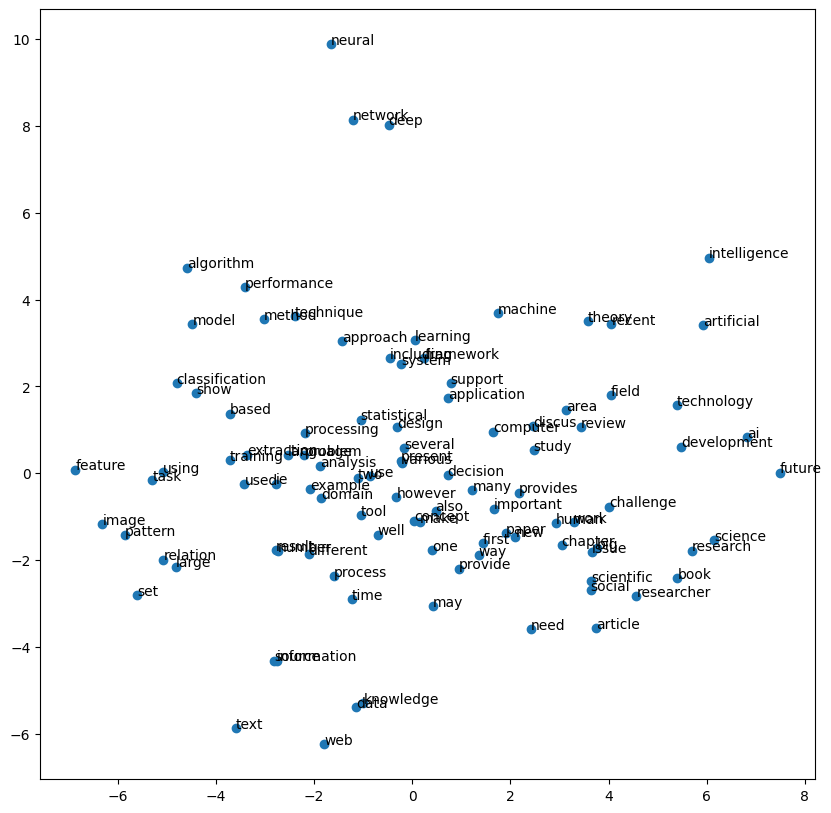

In [32]:
# Write your code here
!pip install gensim matplotlib scikit-learn

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ast

import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Tokenize and preprocess the text data
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    return tokens

# Tokenize and preprocess all texts in the DataFrame
tokenized_texts = df['lemmatized'].dropna().apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=300, window=5, min_count=1, workers=4)

# Function to visualize embeddings
def visualize_embeddings(model, words=None, sample=100):
    if words is None:
        words = model.wv.index_to_key[:sample]

    word_vectors = model.wv[words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

# Visualize embeddings
visualize_embeddings(word2vec_model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [40]:
# The GitHub link of your final csv file


# Link: https://raw.githubusercontent.com/HarshaSolingaram/INFO_5731/main/sentiment_analysis_results.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [10]:
# Type your answer
"""
this assignment was same as explained in the class and shares lo of information.
it was all good as i am working on abstracts i am not sure about the results and 4th question reviews.
thank you for the assignment it is useful as always.
"""